## GBC104 - Analysing Liver Disease Assignment 
In this assignment, we are using classification to determine which are the features that could help to
give a good accuracy for liver disease

The dataset came from https://www.kaggle.com/uciml/indian-liver-patient-records
and it was collected from North East of Andhra Pradesh, India. It contains 416 liver patient records and 167 non liver patient records.

<em><strong>Please note the original csv Total_Protiens - is mis-spelling , I have corrected the original header for correct spelling</strong></em>

Attributes of the dataset is as follows:- 

| No.   | Attribute                     | Domain           |
|:-----:| :---------------------------: | :---------:      |
| 1     | Age				            | Age of patient (Age over 89 is marked under "90")   |
| 2     | Gender                        | Female, Male |
| 3     | Total_Bilirubin               | Numerical        |
| 4     | Direct_Bilirubin     				| Numerical         |
| 5     | Alkaline_Phosphotase              | Numerical         |
| 6     | Alamine_Aminotransferase         | Numerical         |
| 7     | Aspartate_Aminotransferase       | Numerical          |
| 8     | Total_Proteins                  | Numerical          |
| 9     | Albumin                          | Numerical        |
| 10    | Albumin_and_Globulin_Ratio | Numerical          |
| 11    | Dataset                           | Whether patient has liver disease [1=liver disease patient, 2= non live disease patient ]          |


The first 10 lines of the data file is as follows:
```
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
26,Female,0.9,0.2,154,16,12,7,3.5,1,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2

```

We shall use the liver disease dataset, and use different algo to run classifciation using spark to see if previous researches (predicting Random forest as the best algo) holds true 

### Loading the Data
Let us first create the schema and load the data into a DataFrame:
```python
from pyspark.sql.types import *

schema = StructType( [
    StructField("Age", DoubleType(), True),
    StructField("Gender", StringType(), True),
    StructField("Total_Bilirubin", DoubleType(), True),
    StructField("Direct_Bilirubin", DoubleType(), True),
    StructField("Alkaline_Phosphotase", DoubleType(), True),    
    StructField("Alamine_Aminotransferase", DoubleType(), True),
    StructField("Aspartate_Aminotransferase", DoubleType(), True),
    StructField("Total_Proteins", DoubleType(), True),
    StructField("Albumin",DoubleType(), True),
    StructField("Albumin_and_Globulin_Ratio", DoubleType(), True),
    StructField("Dataset", DoubleType(), True)
])
liver_df01 = spark.read.csv("/home/training/data/002_Liver/indian_liver_patient.csv", schema=schema, header=True)
```

In [1]:
from pyspark.sql.types import *
from pyspark.sql.functions import coalesce, col, lit, when
import pyspark.sql.functions as fn

schema = StructType( [
    StructField("Age", DoubleType(), True),
    StructField("Gender", StringType(), True),
    StructField("Total_Bilirubin", DoubleType(), True),
    StructField("Direct_Bilirubin", DoubleType(), True),
    StructField("Alkaline_Phosphotase", DoubleType(), True),    
    StructField("Alamine_Aminotransferase", DoubleType(), True),
    StructField("Aspartate_Aminotransferase", DoubleType(), True),
    StructField("Total_Proteins", DoubleType(), True),
    StructField("Albumin",DoubleType(), True),
    StructField("Albumin_and_Globulin_Ratio", DoubleType(), True),
    StructField("Dataset", DoubleType(), True)
])
liver_df01 = spark.read.csv("/home/training/data/002_Liver/indian_liver_patient.csv", schema=schema, header=True)
liver_df01.printSchema() 

root
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Total_Bilirubin: double (nullable = true)
 |-- Direct_Bilirubin: double (nullable = true)
 |-- Alkaline_Phosphotase: double (nullable = true)
 |-- Alamine_Aminotransferase: double (nullable = true)
 |-- Aspartate_Aminotransferase: double (nullable = true)
 |-- Total_Proteins: double (nullable = true)
 |-- Albumin: double (nullable = true)
 |-- Albumin_and_Globulin_Ratio: double (nullable = true)
 |-- Dataset: double (nullable = true)



### Cleaning up the Data
1. Finding out the descriptive statistics

In [2]:
liver_df01.count()

583

In [3]:
liver_df01.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Total_Bilirubin: double (nullable = true)
 |-- Direct_Bilirubin: double (nullable = true)
 |-- Alkaline_Phosphotase: double (nullable = true)
 |-- Alamine_Aminotransferase: double (nullable = true)
 |-- Aspartate_Aminotransferase: double (nullable = true)
 |-- Total_Proteins: double (nullable = true)
 |-- Albumin: double (nullable = true)
 |-- Albumin_and_Globulin_Ratio: double (nullable = true)
 |-- Dataset: double (nullable = true)



<em><strong>Let's rename those columns to some shortforms that is easier to remember</em></strong>

In [4]:
liver_df01 = liver_df01.withColumnRenamed("Total_Bilirubin", "TB")
liver_df01 = liver_df01.withColumnRenamed("Direct_Bilirubin", "DB")
liver_df01 = liver_df01.withColumnRenamed("Alkaline_Phosphotase", "Alkphos")
liver_df01 = liver_df01.withColumnRenamed("Alamine_Aminotransferase", "Sgpt")
liver_df01 = liver_df01.withColumnRenamed("Aspartate_Aminotransferase", "Sgot")
liver_df01 = liver_df01.withColumnRenamed("Total_Proteins", "TP")
liver_df01 = liver_df01.withColumnRenamed("Albumin", "ALB")
liver_df01 = liver_df01.withColumnRenamed("Albumin_and_Globulin_Ratio", "AGRatio")
liver_df01.columns

['Age',
 'Gender',
 'TB',
 'DB',
 'Alkphos',
 'Sgpt',
 'Sgot',
 'TP',
 'ALB',
 'AGRatio',
 'Dataset']

Let's take a look at the gender distribution in the dataset.

In [5]:
liver_df01.groupby('Gender').count().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  142|
|  Male|  441|
+------+-----+



### Here we see that females is under-representated - so it is possible that features do not apply so well for prediction in liver disease in females.


Assign an id to each row, easier to track rows if there is a need to replace value

In [6]:
#assign an id to each row, easier to track for replacement of values if needed)
liver_df01 = liver_df01.withColumn('new_id', fn.monotonically_increasing_id())
liver_df01.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- TB: double (nullable = true)
 |-- DB: double (nullable = true)
 |-- Alkphos: double (nullable = true)
 |-- Sgpt: double (nullable = true)
 |-- Sgot: double (nullable = true)
 |-- TP: double (nullable = true)
 |-- ALB: double (nullable = true)
 |-- AGRatio: double (nullable = true)
 |-- Dataset: double (nullable = true)
 |-- new_id: long (nullable = false)



##### We will need to convert 'values in dataset' column to something that makes sense [1=liver disease, 0=no liver disease] and to rename 'dataset' to 'class' instead 

In [7]:
#gets distinct column in dataset - expects only 1,2 
liver_df01.select("Dataset").distinct().show()
liver_df02 = liver_df01.replace([1, 2], [1, 0], 'Dataset')
liver_df02 = liver_df02.withColumnRenamed("Dataset", "Class")
liver_df02.show(5,truncate=False)
#gets distinct column in classnow - expects only 1,0
liver_df02.select("Class").distinct().show()
liver_df02.select("Gender").distinct().show()

+-------+
|Dataset|
+-------+
|    1.0|
|    2.0|
+-------+

+----+------+----+---+-------+----+-----+---+---+-------+-----+------+
|Age |Gender|TB  |DB |Alkphos|Sgpt|Sgot |TP |ALB|AGRatio|Class|new_id|
+----+------+----+---+-------+----+-----+---+---+-------+-----+------+
|65.0|Female|0.7 |0.1|187.0  |16.0|18.0 |6.8|3.3|0.9    |1.0  |0     |
|62.0|Male  |10.9|5.5|699.0  |64.0|100.0|7.5|3.2|0.74   |1.0  |1     |
|62.0|Male  |7.3 |4.1|490.0  |60.0|68.0 |7.0|3.3|0.89   |1.0  |2     |
|58.0|Male  |1.0 |0.4|182.0  |14.0|20.0 |6.8|3.4|1.0    |1.0  |3     |
|72.0|Male  |3.9 |2.0|195.0  |27.0|59.0 |7.3|2.4|0.4    |1.0  |4     |
+----+------+----+---+-------+----+-----+---+---+-------+-----+------+
only showing top 5 rows

+-----+
|Class|
+-----+
|  0.0|
|  1.0|
+-----+

+------+
|Gender|
+------+
|Female|
|  Male|
+------+



#### Find out which columns have "" values or null values or isnan

In [8]:
from pyspark.sql.functions import isnan

#liver_df01.filter((liver_df01["Albumin_and_Globulin_Ratio"] == "") | liver_df01["Albumin_and_Globulin_Ratio"].isNull() | isnan(liver_df01["Albumin_and_Globulin_Ratio"])).count()
for i in liver_df02.columns: 
    count = liver_df02.filter( (liver_df02[i] == "") | liver_df02[i].isNull() | isnan(liver_df02[i])).count()
    print("null|empty|nan in ["+i+"]  count = "+str(count)) 

null|empty|nan in [Age]  count = 0
null|empty|nan in [Gender]  count = 0
null|empty|nan in [TB]  count = 0
null|empty|nan in [DB]  count = 0
null|empty|nan in [Alkphos]  count = 0
null|empty|nan in [Sgpt]  count = 0
null|empty|nan in [Sgot]  count = 0
null|empty|nan in [TP]  count = 0
null|empty|nan in [ALB]  count = 0
null|empty|nan in [AGRatio]  count = 4
null|empty|nan in [Class]  count = 0
null|empty|nan in [new_id]  count = 0


In [9]:
#take a look at those rows for AGRatio=null 
liver_df02.filter( (liver_df02["AGRatio"] == "") | liver_df02["AGRatio"].isNull() | isnan(liver_df02["AGRatio"])).show()

+----+------+---+---+-------+----+----+---+---+-------+-----+------+
| Age|Gender| TB| DB|Alkphos|Sgpt|Sgot| TP|ALB|AGRatio|Class|new_id|
+----+------+---+---+-------+----+----+---+---+-------+-----+------+
|45.0|Female|0.9|0.3|  189.0|23.0|33.0|6.6|3.9|   null|  1.0|   209|
|51.0|  Male|0.8|0.2|  230.0|24.0|46.0|6.5|3.1|   null|  1.0|   241|
|35.0|Female|0.6|0.2|  180.0|12.0|15.0|5.2|2.7|   null|  0.0|   253|
|27.0|  Male|1.3|0.6|  106.0|25.0|54.0|8.5|4.8|   null|  0.0|   312|
+----+------+---+---+-------+----+----+---+---+-------+-----+------+



In [10]:
#take a look at the descriptive stats for these columns
numerical_columns = [ ] 
numerical_columns = [ "Age", "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB","AGRatio" ] 
for i in numerical_columns: 
    liver_df02.describe(i).show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               583|
|   mean| 44.74614065180103|
| stddev|16.189833304694375|
|    min|               4.0|
|    max|              90.0|
+-------+------------------+

+-------+-----------------+
|summary|               TB|
+-------+-----------------+
|  count|              583|
|   mean|3.298799313893652|
| stddev|6.209521726180151|
|    min|              0.4|
|    max|             75.0|
+-------+-----------------+

+-------+------------------+
|summary|                DB|
+-------+------------------+
|  count|               583|
|   mean|1.4861063464837074|
| stddev| 2.808497617658965|
|    min|               0.1|
|    max|              19.7|
+-------+------------------+

+-------+------------------+
|summary|           Alkphos|
+-------+------------------+
|  count|               583|
|   mean|290.57632933104634|
| stddev|242.93798917934402|
|    min|              63.0|
|    max|           

In [11]:
## display the stats in a friendly table using html
print ("Pre-patch Data...Stats")
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

pandas_DF = liver_df02.toPandas() 

descPSNAS= pandas_DF[numerical_columns].describe()

descPSNAS['Age'].round(decimals=3)
descPSNAS['TB'].round(decimals=3)
descPSNAS['DB'].round(decimals=3)
descPSNAS['Alkphos'].round(decimals=3)
descPSNAS['Sgpt'].round(decimals=3)
descPSNAS['Sgot'].round(decimals=3)
descPSNAS['TP'].round(decimals=3)
descPSNAS['ALB'].round(decimals=3)
descPSNAS['AGRatio'].round(decimals=3)

from IPython.display import display, HTML


display(HTML(descPSNAS.to_html()))

Pre-patch Data...Stats


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AGRatio
count,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,579.00
mean,44.75,3.30,1.49,290.58,80.71,109.91,6.48,3.14,0.95
std,16.19,6.21,2.81,242.94,182.62,288.92,1.09,0.80,0.32
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30
25%,33.00,0.80,0.20,175.50,23.00,25.00,5.80,2.60,0.70
50%,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93
75%,58.00,2.60,1.30,298.00,60.50,87.00,7.20,3.80,1.10
max,90.00,75.00,19.70,"2,110.00","2,000.00","4,929.00",9.60,5.50,2.80


Since the empty rows are 2 for male and 2 for female, and 1=liver_disease,0=class, each, <em><strong>we replace them accordingly with mean of [AGRatio] for [liver_disease], and mean of AGRatio for [non-liver disease]</strong></em>

In [12]:
#import pyspark.sql.functions as fn
#gets the mean of AGRation for Liver disease =1 
#mean_AGRatio_diseased = liver_df02.agg(fn.mean(liver_df02.filter("Class==1")))
#print (liver_df02.filter(liver_df02['Class']==1).agg({"AGRatio": "avg"}))
mean_AGRatio_diseased_df = (liver_df02.filter(liver_df02['Class']==1).agg({"AGRatio": "avg"}))
#print( type(mean_AGRatio_diseased_df))
#liver_df02.filter(liver_df02.Class=1).groupBy(Class).avg('AGRatio')
mean_AGRatio_diseased = mean_AGRatio_diseased_df.first()[0] 

print( ' mean_AGRatio_diseased ' + str(mean_AGRatio_diseased) )

#gets the mean of AGRation for Liver disease =0
mean_AGRatio_nondiseased_df = (liver_df02.filter(liver_df02['Class']==0).agg({"AGRatio": "avg"}))
mean_AGRatio_non_diseased = mean_AGRatio_nondiseased_df.first()[0] 
print( ' mean_AGRatio_non_diseased ' + str(mean_AGRatio_non_diseased) )


 mean_AGRatio_diseased 0.9141787439613527
 mean_AGRatio_non_diseased 1.0295757575757576


In [13]:
import pyspark.sql.functions as F
liver_df02_t = liver_df02.withColumn('newAGRatio',
    fn.when( (liver_df02.Class == 1) &  ((liver_df02.AGRatio == "") | liver_df02.AGRatio.isNull() | isnan(liver_df02.AGRatio)) , mean_AGRatio_diseased )
     .when( (liver_df02.Class == 0) &  ((liver_df02.AGRatio == "") | liver_df02.AGRatio.isNull() | isnan(liver_df02.AGRatio)) , mean_AGRatio_non_diseased )
     .otherwise(liver_df02.AGRatio))


#liver_df02_t.show() 
#show if these rows are filled properly 
liver_df02_t.select("*").where("new_id = 209 or new_id =241 or new_id =253 or new_id = 312 ").show()

#find out if there's still empty,null,na
liver_df02_t.filter( (liver_df02_t["newAGRatio"] == "") | liver_df02_t["newAGRatio"].isNull() | isnan(liver_df02_t["newAGRatio"])).show()

+----+------+---+---+-------+----+----+---+---+-------+-----+------+------------------+
| Age|Gender| TB| DB|Alkphos|Sgpt|Sgot| TP|ALB|AGRatio|Class|new_id|        newAGRatio|
+----+------+---+---+-------+----+----+---+---+-------+-----+------+------------------+
|45.0|Female|0.9|0.3|  189.0|23.0|33.0|6.6|3.9|   null|  1.0|   209|0.9141787439613527|
|51.0|  Male|0.8|0.2|  230.0|24.0|46.0|6.5|3.1|   null|  1.0|   241|0.9141787439613527|
|35.0|Female|0.6|0.2|  180.0|12.0|15.0|5.2|2.7|   null|  0.0|   253|1.0295757575757576|
|27.0|  Male|1.3|0.6|  106.0|25.0|54.0|8.5|4.8|   null|  0.0|   312|1.0295757575757576|
+----+------+---+---+-------+----+----+---+---+-------+-----+------+------------------+

+---+------+---+---+-------+----+----+---+---+-------+-----+------+----------+
|Age|Gender| TB| DB|Alkphos|Sgpt|Sgot| TP|ALB|AGRatio|Class|new_id|newAGRatio|
+---+------+---+---+-------+----+----+---+---+-------+-----+------+----------+
+---+------+---+---+-------+----+----+---+---+-------+----

In [14]:
## display the stats in a friendly table
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

pandas_DF = liver_df02_t.toPandas() 

descPSNAS= pandas_DF.describe()

descPSNAS['Age'].round(decimals=3)
descPSNAS['TB'].round(decimals=3)
descPSNAS['DB'].round(decimals=3)
descPSNAS['Alkphos'].round(decimals=3)
descPSNAS['Sgpt'].round(decimals=3)
descPSNAS['Sgot'].round(decimals=3)
descPSNAS['TP'].round(decimals=3)
descPSNAS['ALB'].round(decimals=3)
descPSNAS['AGRatio'].round(decimals=3)
descPSNAS['newAGRatio'].round(decimals=3)

from IPython.display import display, HTML


display(HTML(descPSNAS.to_html()))

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AGRatio,Class,new_id,newAGRatio
count,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,579.00,583.00,583.00,583.00
mean,44.75,3.30,1.49,290.58,80.71,109.91,6.48,3.14,0.95,0.71,291.00,0.95
std,16.19,6.21,2.81,242.94,182.62,288.92,1.09,0.80,0.32,0.45,168.44,0.32
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30,0.00,0.00,0.30
25%,33.00,0.80,0.20,175.50,23.00,25.00,5.80,2.60,0.70,0.00,145.50,0.70
50%,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93,1.00,291.00,0.93
75%,58.00,2.60,1.30,298.00,60.50,87.00,7.20,3.80,1.10,1.00,436.50,1.10
max,90.00,75.00,19.70,"2,110.00","2,000.00","4,929.00",9.60,5.50,2.80,1.00,582.00,2.80


In [15]:
#optional - describe in each column 
numerical_columns = [ "Age", "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB","AGRatio" , "newAGRatio"] 
for i in numerical_columns: 
    liver_df02_t.describe(i).show()
#print out a histogram and see what's going on now 

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               583|
|   mean| 44.74614065180103|
| stddev|16.189833304694375|
|    min|               4.0|
|    max|              90.0|
+-------+------------------+

+-------+-----------------+
|summary|               TB|
+-------+-----------------+
|  count|              583|
|   mean|3.298799313893652|
| stddev|6.209521726180151|
|    min|              0.4|
|    max|             75.0|
+-------+-----------------+

+-------+------------------+
|summary|                DB|
+-------+------------------+
|  count|               583|
|   mean|1.4861063464837074|
| stddev| 2.808497617658965|
|    min|               0.1|
|    max|              19.7|
+-------+------------------+

+-------+------------------+
|summary|           Alkphos|
+-------+------------------+
|  count|               583|
|   mean|290.57632933104634|
| stddev|242.93798917934402|
|    min|              63.0|
|    max|           

In [16]:
#get outliers for TB
quantiles_TB = liver_df02_t.approxQuantile("TB", [0.25, 0.75], 0.05)
print ( quantiles_TB )
IQR_TB = quantiles_TB[1] - quantiles_TB[0]
boundsTB = [ quantiles_TB[0] - 1.5 * IQR_TB, quantiles_TB[1] + 1.5 * IQR_TB ]
##show those records that are outliers for TB 
liver_df02_t.filter( (liver_df02_t.TB < boundsTB[0]) | (liver_df02_t.TB > boundsTB[1]) ).show()


[0.8, 2.1]
+----+------+----+---+-------+------+-----+---+---+-------+-----+------+----------+
| Age|Gender|  TB| DB|Alkphos|  Sgpt| Sgot| TP|ALB|AGRatio|Class|new_id|newAGRatio|
+----+------+----+---+-------+------+-----+---+---+-------+-----+------+----------+
|62.0|  Male|10.9|5.5|  699.0|  64.0|100.0|7.5|3.2|   0.74|  1.0|     1|      0.74|
|62.0|  Male| 7.3|4.1|  490.0|  60.0| 68.0|7.0|3.3|   0.89|  1.0|     2|      0.89|
|62.0|  Male| 6.8|3.0|  542.0| 116.0| 66.0|6.4|3.1|    0.9|  1.0|    22|       0.9|
|34.0|  Male| 4.1|2.0|  289.0| 875.0|731.0|5.0|2.7|    1.1|  1.0|    25|       1.1|
|34.0|  Male| 4.1|2.0|  289.0| 875.0|731.0|5.0|2.7|    1.1|  1.0|    26|       1.1|
|34.0|  Male| 6.2|3.0|  240.0|1680.0|850.0|7.2|4.0|    1.2|  1.0|    27|       1.2|
|46.0|Female|14.2|7.8|  374.0|  38.0| 77.0|4.3|2.0|    0.8|  1.0|    37|       0.8|
|42.0|  Male| 6.8|3.2|  630.0|  25.0| 47.0|6.1|2.3|    0.6|  0.0|    42|       0.6|
|55.0|  Male|18.4|8.8|  206.0|  64.0|178.0|6.2|1.8|    0.4|  1.0|

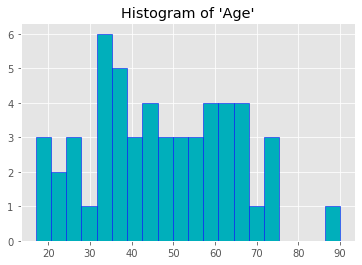

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("Age").collect()]
#print (type (bal_list))
#for x in range(len(bal_list)): 
#    print(bal_list[x]) 
plt.title("Histogram of 'Age'")
plt.hist(bal_list, bins = 20,color = "#00AFBB",edgecolor='blue')
plt.show()
#plt.hist(bal_list, bins = 20,color = "#00AFBB",edgecolor='blue')

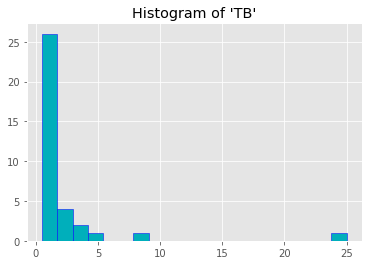

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("TB").collect()]
plt.title("Histogram of 'TB'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

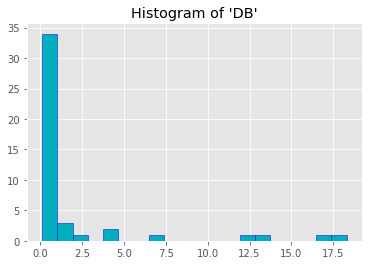

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("DB").collect()]
plt.title("Histogram of 'DB'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

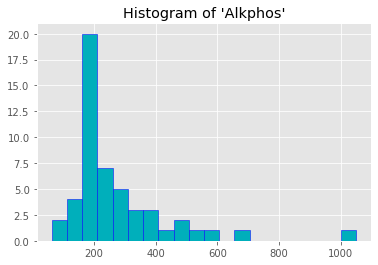

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("Alkphos").collect()]
plt.title("Histogram of 'Alkphos'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

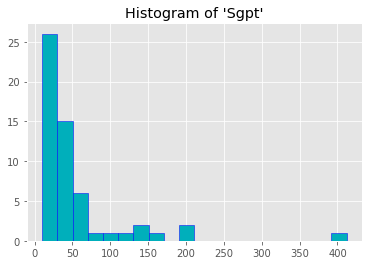

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("Sgpt").collect()]
plt.title("Histogram of 'Sgpt'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

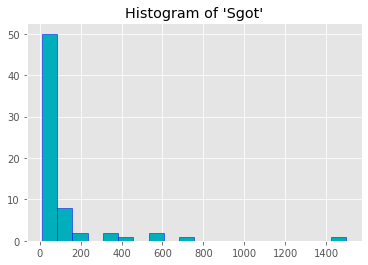

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("Sgot").collect()]
plt.title("Histogram of 'Sgot'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

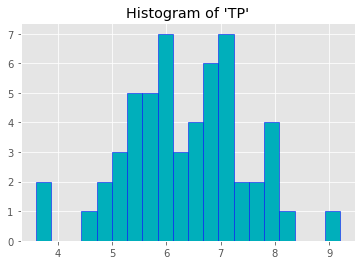

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("TP").collect()]
plt.title("Histogram of 'TP'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

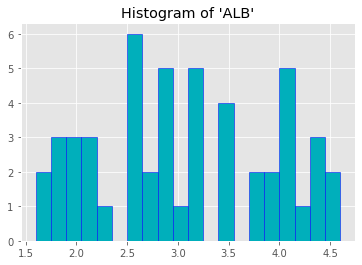

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("ALB").collect()]
plt.title("Histogram of 'ALB'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

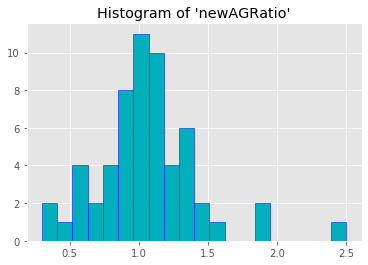

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sampleDF = liver_df02_t.sample(fraction = 0.1)
bal_list = [i[0] for i in sampleDF.select("newAGRatio").collect()]
plt.title("Histogram of 'newAGRatio'")
plt.hist(bal_list, bins = 20, color = "#00AFBB",edgecolor='blue')
plt.show()

### BOxplots before manipulating data 

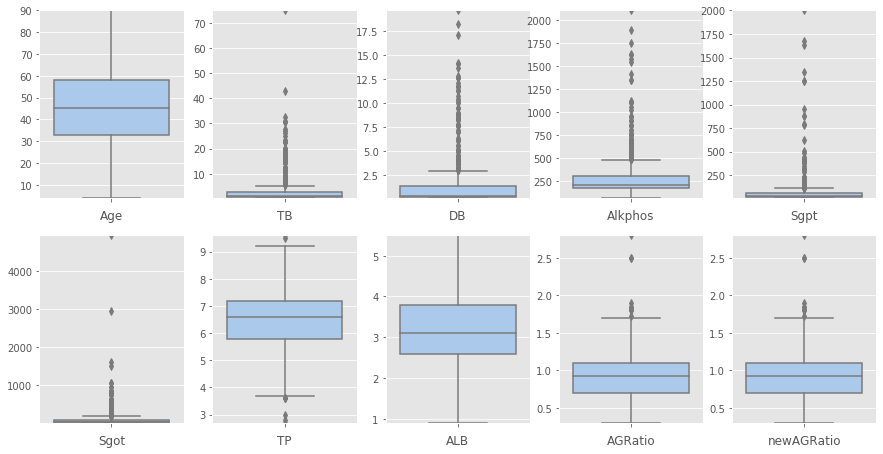

In [26]:
#lets play woith some box plots 
import seaborn as sns

#plt.figure(figsize=(12,12))
liver02P = liver_df02_t.toPandas()
#sns.boxplot(data=liver02P,palette='pastel')
#sns.palplot(sns.color_palette("RdBu", 10))
##cols = liver_df02_t.select("Age", "Sgot","TP").toPandas()
cols = ["Age" ,"TB" ,"DB" ,"Alkphos" ,"Sgpt" ,"Sgot" ,"TP" ,"ALB", "AGRatio", "newAGRatio"] 
q=1
plt.figure(figsize=(15,20))
#fig, axes = plt.subplots(1, len(cols))

for col in cols:
   plt.subplot(5,5,q)
   ##ax = sns.boxplot(liver02P[col],color='red')
   ax = sns.boxplot(y=liver02P[col],palette='pastel')
   ax.set_ylim(liver02P[col].min(), liver02P[col].max())
   #ax = sns.boxplot(y=liver02P[col], ax=axes.flatten()[i])
   #ax.set_ylim( y=liver02P[col].min(), y=liver02P[col].max())
   ax.set_ylabel('')
   plt.xlabel(col)
   q+=1
plt.show()

In [27]:

numerical_columns_features = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 
for i in numerical_columns_features: 
    #liver_df02_t.describe(i).show()
    quantiles_F = liver_df02_t.approxQuantile(i, [0.25, 0.75], 0.05)
    #print ( str(quantiles_F) + "..."+i + "..." )
    IQR_F = quantiles_F[1] - quantiles_F[0]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F))
    bounds_F = [ quantiles_F[0] - 1.5 * IQR_F, quantiles_F[1] + 1.5 * IQR_F ]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F)+ "...bounds_F[0]"+ str(bounds_F[0])+"..bounds_F[1]" + str(bounds_F[1]))
    #liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).show()
    no_outliers_F = liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).count() 
    print( "No. of outliers for column ["+i+"] > " + str(no_outliers_F) ) 

#do not need to do scaling at the moment as the classification models are not sensitive to outliers    
#from pyspark.ml import Pipeline
#from pyspark.ml.feature import MinMaxScaler
#import pyspark.ml.feature as ft

#assembler =  ft.VectorAssembler(inputCols=["TB"], outputCol="TB_vec")
#scaler = ft.MinMaxScaler(inputCol="TB_vec", outputCol="TB_scaled")
#pipeline = Pipeline(stages=[assembler, scaler])
#scalerModel = pipeline.fit(liver_df02_t)
#scaledData = scalerModel.transform(liver_df02_t)
#scaledData.show()


No. of outliers for column [TB] > 98
No. of outliers for column [DB] > 96
No. of outliers for column [Alkphos] > 77
No. of outliers for column [Sgpt] > 80
No. of outliers for column [Sgot] > 80
No. of outliers for column [TP] > 8
No. of outliers for column [ALB] > 2
No. of outliers for column [newAGRatio] > 10


In [28]:
#display skewness for interest 
for i in numerical_columns_features: 
    liver_df02_t.agg( {i: 'skewness'} ).show()

+-----------------+
|     skewness(TB)|
+-----------------+
|4.894838524887879|
+-----------------+

+-----------------+
|     skewness(DB)|
+-----------------+
|3.204131760437804|
+-----------------+

+-----------------+
|skewness(Alkphos)|
+-----------------+
|3.755412227842377|
+-----------------+

+-----------------+
|   skewness(Sgpt)|
+-----------------+
|6.532329464026133|
+-----------------+

+------------------+
|    skewness(Sgot)|
+------------------+
|10.519023554210746|
+------------------+

+-------------------+
|       skewness(TP)|
+-------------------+
|-0.2849366548744746|
+-------------------+

+--------------------+
|       skewness(ALB)|
+--------------------+
|-0.04357225173558839|
+--------------------+

+--------------------+
|skewness(newAGRatio)|
+--------------------+
|  0.9911933419319262|
+--------------------+



In [29]:
liver_df02_t[["Gender", "Class","Age"]].groupby(["Class","Gender"]).count().show()
#gets the mean of age for both liver_disease and non-liver-disease 
liver_df02_t[["Gender", "Class","Age"]].groupby(["Class","Gender"]).mean().show()
#this tells us that the age has something to do with both groups

+-----+------+-----+
|Class|Gender|count|
+-----+------+-----+
|  1.0|Female|   92|
|  1.0|  Male|  324|
|  0.0|Female|   50|
|  0.0|  Male|  117|
+-----+------+-----+

+-----+------+----------+------------------+
|Class|Gender|avg(Class)|          avg(Age)|
+-----+------+----------+------------------+
|  1.0|Female|       1.0| 43.34782608695652|
|  1.0|  Male|       1.0| 46.95061728395062|
|  0.0|Female|       0.0|             42.74|
|  0.0|  Male|       0.0|40.598290598290596|
+-----+------+----------+------------------+



In [30]:
#let's do a correlation across all the features
numerical = [ "Age", "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 
n_numerical = len(numerical)
corr = []

for i in range(0, n_numerical):
    temp = [None] * i
    for j in range(i, n_numerical):
        corXY = round( liver_df02_t.corr(numerical[i], numerical[j]) ,2 )
        temp.append( corXY )
    corr.append(temp)

# print the correlation matrix in a nicely formatted table
from tabulate import tabulate
print(tabulate(corr, headers=numerical, showindex=numerical, tablefmt="fancy_grid", numalign="center"))

╒════════════╤═══════╤══════╤══════╤═══════════╤════════╤════════╤═══════╤═══════╤══════════════╕
│            │  Age  │  TB  │  DB  │  Alkphos  │  Sgpt  │  Sgot  │  TP   │  ALB  │  newAGRatio  │
╞════════════╪═══════╪══════╪══════╪═══════════╪════════╪════════╪═══════╪═══════╪══════════════╡
│ Age        │   1   │ 0.01 │ 0.01 │   0.08    │ -0.09  │ -0.02  │ -0.19 │ -0.27 │    -0.22     │
├────────────┼───────┼──────┼──────┼───────────┼────────┼────────┼───────┼───────┼──────────────┤
│ TB         │       │  1   │ 0.87 │   0.21    │  0.21  │  0.24  │ -0.01 │ -0.22 │    -0.21     │
├────────────┼───────┼──────┼──────┼───────────┼────────┼────────┼───────┼───────┼──────────────┤
│ DB         │       │      │  1   │   0.23    │  0.23  │  0.26  │  -0   │ -0.23 │     -0.2     │
├────────────┼───────┼──────┼──────┼───────────┼────────┼────────┼───────┼───────┼──────────────┤
│ Alkphos    │       │      │      │     1     │  0.13  │  0.17  │ -0.03 │ -0.17 │    -0.23     │
├────────────┼──────

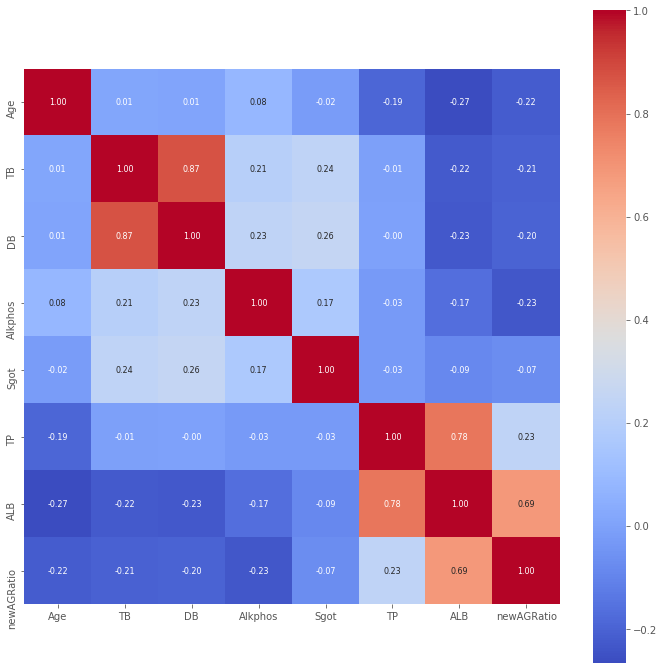

In [31]:
from pyspark.ml.stat import Correlation
%matplotlib inline
import matplotlib.pyplot as plt
import pyspark.ml.feature as ft
import seaborn as sns


plt.figure(figsize=(12,12))

myGraph = liver_df02_t
vector_col = "corr_features"
assembler = ft.VectorAssembler(inputCols=['Age' ,'TB', 'DB','Alkphos', 'Sgot', 'TP' ,'ALB','newAGRatio'], 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(myGraph).select(vector_col)
#matrix = Correlation.corr(myGraph_vector, vector_col)

matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
#print(corrmatrix)
x_axis_labels = ['Age' ,'TB', 'DB','Alkphos', 'Sgot', 'TP' ,'ALB','newAGRatio'] # labels for x-axis
y_axis_labels = ['Age' ,'TB', 'DB','Alkphos', 'Sgot', 'TP' ,'ALB','newAGRatio'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(corrmatrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           cmap= 'coolwarm')


#sns.heatmap(corrmatrix, xticklabels=False, yticklabels=False)
#sns.heatmap(corrmatrix, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
#           cmap= 'coolwarm')

### END of Exploration

## Let's try a decision tree first with all features
## DECISION TREE I

In [32]:
#drop gender and do the decision tree 
liver_df03_noGender = liver_df02_t.drop("Gender").drop("new_id").drop("AGRatio")
liver_df03_noGender.show(5)


for i in liver_df03_noGender.columns: 
    count = liver_df03_noGender.filter( (liver_df03_noGender[i] == "") | liver_df03_noGender[i].isNull() | isnan(liver_df03_noGender[i])).count()
    print("null|empty|nana in ["+i+"]  count = "+str(count)) 

#dt_training_data, dt_test_data = liver_df03_noGender.randomSplit([0.7, 0.3], seed=1)
#dt_training_data.persist()

training_data, testing_data = liver_df03_noGender.randomSplit([0.7, 0.3], seed=1)
training_data.persist()
testing_data.persist() 

+----+----+---+-------+----+-----+---+---+-----+----------+
| Age|  TB| DB|Alkphos|Sgpt| Sgot| TP|ALB|Class|newAGRatio|
+----+----+---+-------+----+-----+---+---+-----+----------+
|65.0| 0.7|0.1|  187.0|16.0| 18.0|6.8|3.3|  1.0|       0.9|
|62.0|10.9|5.5|  699.0|64.0|100.0|7.5|3.2|  1.0|      0.74|
|62.0| 7.3|4.1|  490.0|60.0| 68.0|7.0|3.3|  1.0|      0.89|
|58.0| 1.0|0.4|  182.0|14.0| 20.0|6.8|3.4|  1.0|       1.0|
|72.0| 3.9|2.0|  195.0|27.0| 59.0|7.3|2.4|  1.0|       0.4|
+----+----+---+-------+----+-----+---+---+-----+----------+
only showing top 5 rows

null|empty|nana in [Age]  count = 0
null|empty|nana in [TB]  count = 0
null|empty|nana in [DB]  count = 0
null|empty|nana in [Alkphos]  count = 0
null|empty|nana in [Sgpt]  count = 0
null|empty|nana in [Sgot]  count = 0
null|empty|nana in [TP]  count = 0
null|empty|nana in [ALB]  count = 0
null|empty|nana in [Class]  count = 0
null|empty|nana in [newAGRatio]  count = 0


DataFrame[Age: double, TB: double, DB: double, Alkphos: double, Sgpt: double, Sgot: double, TP: double, ALB: double, Class: double, newAGRatio: double]

In [33]:
import pyspark.ml.feature as ft

In [34]:
input_cols = [e for e in liver_df03_noGender.columns if e != 'Class']
#print (type(input_cols))
featuresCreator = ft.VectorAssembler(inputCols=input_cols, outputCol="features")



In [35]:
import pyspark.ml.classification as cl
dt = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 

In [36]:
from pyspark.ml import Pipeline
pipeline_dt = Pipeline( stages = [featuresCreator, dt] )
#model_dt = pipeline_dt.fit(dt_training_data)
model_dt = pipeline_dt.fit(training_data)



In [37]:
predictions_dt = model_dt.transform(testing_data)
type(predictions_dt)
print (predictions_dt.columns)
predictions_dt.select("Class", "rawPrediction", "probability", "prediction").show(truncate=False)

['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'Class', 'newAGRatio', 'features', 'rawPrediction', 'probability', 'prediction']
+-----+-------------+---------------------------------------+----------+
|Class|rawPrediction|probability                            |prediction|
+-----+-------------+---------------------------------------+----------+
|1.0  |[0.0,37.0]   |[0.0,1.0]                              |1.0       |
|0.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[1.0,0.0]    |[1.0,0.0]                              |0.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|1.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[1.0,24.0]   |[0.04,0.96]                        

In [38]:
import pyspark.ml.evaluation as ev
#evaluator_dt = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")

evaluator_dt = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
#evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")

accuracy_dt = evaluator_dt.evaluate(predictions_dt)
print( dt.getImpurity()) 
print(accuracy_dt)

entropy
0.7033585370142429


In [39]:
#let's try to do on impurity = gini for decision tree 
import pyspark.ml.evaluation as ev
input_cols = [e for e in liver_df03_noGender.columns if e != 'Class']
#print (type(input_cols))
featuresCreator_gini = ft.VectorAssembler(inputCols=input_cols, outputCol="features")

dt_gini = cl.DecisionTreeClassifier(labelCol="Class",impurity="gini") 
pipeline_gini = Pipeline( stages = [featuresCreator_gini, dt_gini] )

#training_data, testing_data
model_gini = pipeline_gini.fit(training_data)
predictions_gini = model_gini.transform(testing_data)

#evaluator_gini = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")
evaluator_gini = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")

accuracy_gini = evaluator_gini.evaluate(predictions_gini)
print( dt_gini.getImpurity()) 
print(accuracy_gini)

gini
0.6972041498153684


In [40]:
#sample output
dtree_gini = model_gini.stages[1]
#print(dtree.toDebugString)


input_cols = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'Class', 'newAGRatio' ] 
string = dtree_gini.toDebugString
for i, feat in enumerate(input_cols):
    string = string.replace('feature ' + str(i), feat)
print(string)


DecisionTreeClassificationModel (uid=DecisionTreeClassifier_7e8a73afef39) of depth 5 with 29 nodes
  If (DB <= 0.8500000000000001)
   If (Sgpt <= 64.5)
    If (Age <= 72.5)
     If (Sgot <= 106.5)
      Predict: 1.0
     Else (Sgot > 106.5)
      Predict: 0.0
    Else (Age > 72.5)
     Predict: 1.0
   Else (Sgpt > 64.5)
    If (TP <= 7.95)
     If (Age <= 13.5)
      If (TB <= 0.8500000000000001)
       Predict: 0.0
      Else (TB > 0.8500000000000001)
       Predict: 1.0
     Else (Age > 13.5)
      Predict: 1.0
    Else (TP > 7.95)
     If (Age <= 40.5)
      Predict: 0.0
     Else (Age > 40.5)
      Predict: 1.0
  Else (DB > 0.8500000000000001)
   If (Sgpt <= 12.5)
    Predict: 0.0
   Else (Sgpt > 12.5)
    If (Age <= 38.5)
     If (Age <= 34.5)
      Predict: 1.0
     Else (Age > 34.5)
      If (Sgot <= 153.5)
       Predict: 0.0
      Else (Sgot > 153.5)
       Predict: 1.0
    Else (Age > 38.5)
     If (Alkphos <= 613.0)
      Predict: 1.0
     Else (Alkphos > 613.0)
      If (Ag

#### It seems it does not matter if we use gini or entropy for decision tree
#### Both of them gives an accuracy around 70%
#### Now, try dropping the high correlations and do again


### END DECISION TREE I

### START DECISION TREE 2 TUNE

In [41]:
liver_df03_noGender.show(5)

+----+----+---+-------+----+-----+---+---+-----+----------+
| Age|  TB| DB|Alkphos|Sgpt| Sgot| TP|ALB|Class|newAGRatio|
+----+----+---+-------+----+-----+---+---+-----+----------+
|65.0| 0.7|0.1|  187.0|16.0| 18.0|6.8|3.3|  1.0|       0.9|
|62.0|10.9|5.5|  699.0|64.0|100.0|7.5|3.2|  1.0|      0.74|
|62.0| 7.3|4.1|  490.0|60.0| 68.0|7.0|3.3|  1.0|      0.89|
|58.0| 1.0|0.4|  182.0|14.0| 20.0|6.8|3.4|  1.0|       1.0|
|72.0| 3.9|2.0|  195.0|27.0| 59.0|7.3|2.4|  1.0|       0.4|
+----+----+---+-------+----+-----+---+---+-----+----------+
only showing top 5 rows



### Choose to drop AGRatio, TP, newAGRatio , TB in view of the high coorelations between the feature except for sgot, sgpt 
### Check through the correlations again

In [42]:
liver_df04_noGender = liver_df02_t.drop("Gender").drop("new_id").drop("AGRatio").drop ("TP").drop("newAGRatio").drop("TB")
liver_df04_noGender.columns

['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB', 'Class']

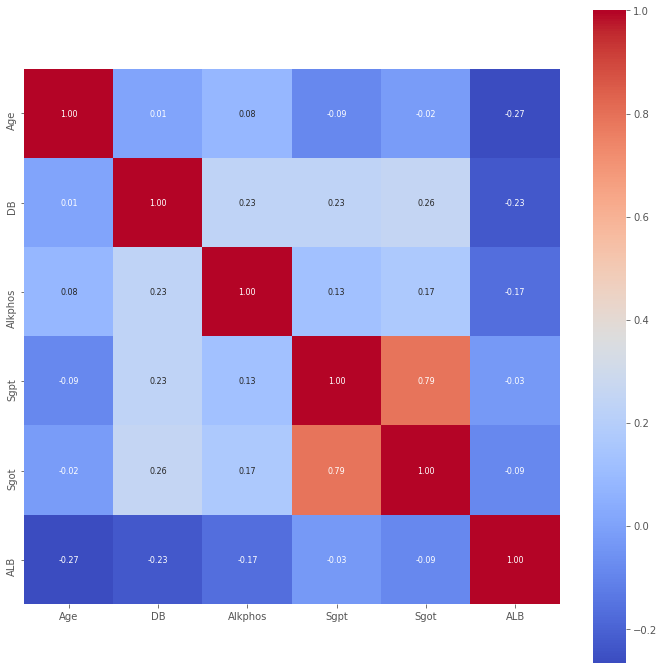

In [43]:
from pyspark.ml.stat import Correlation
plt.figure(figsize=(12,12))

myGraph = liver_df04_noGender
vector_col = "corr_features"
assembler = ft.VectorAssembler(inputCols=['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB'], 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(myGraph).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
#print(corrmatrix)
x_axis_labels = ['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB'] # labels for x-axis
y_axis_labels = ['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(corrmatrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           cmap= 'coolwarm')

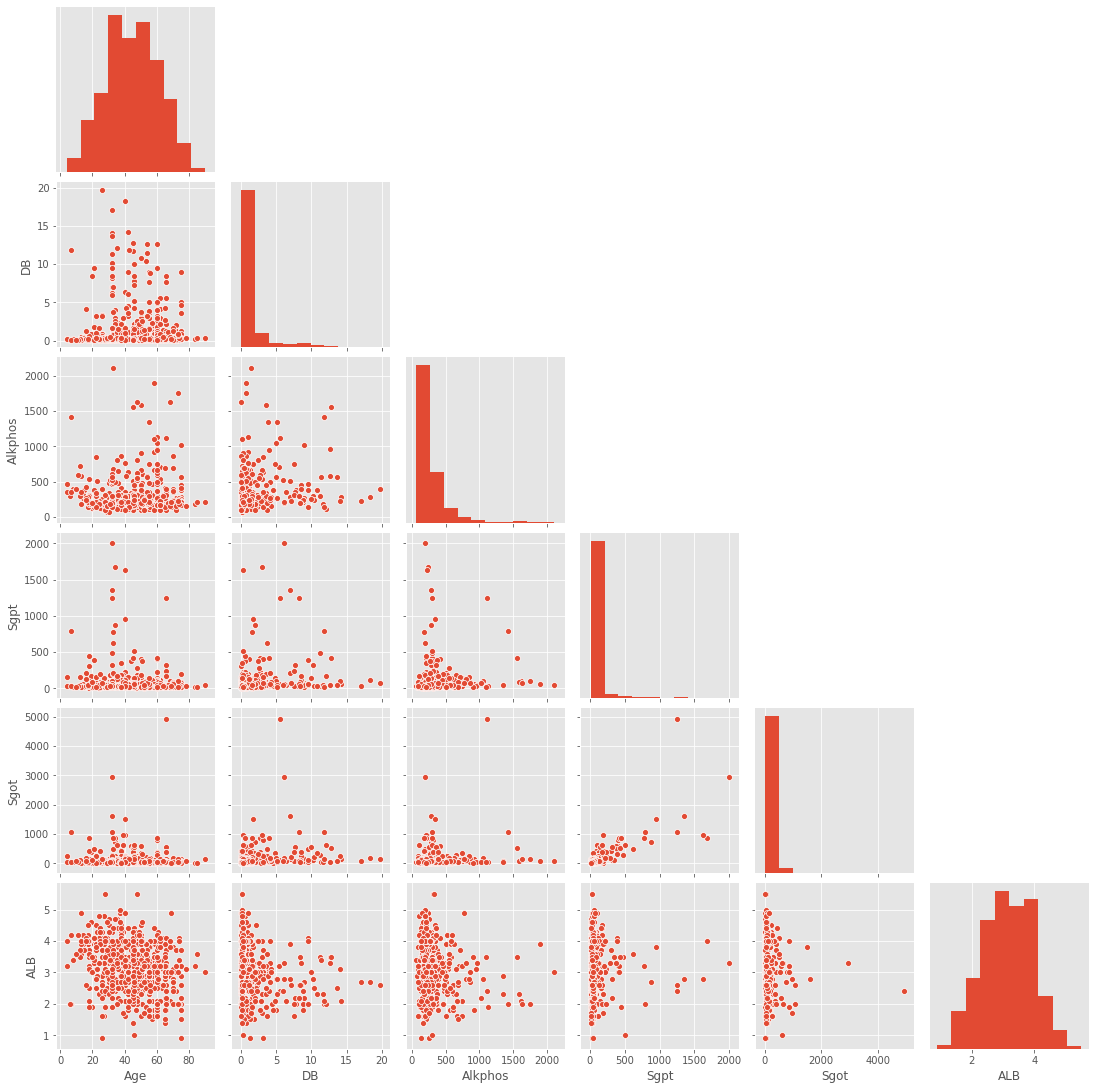

In [44]:
import seaborn as sns
df = liver_df04_noGender.toPandas()
import matplotlib.pyplot as plt
import numpy as np


# Basic correlogram
sns.pairplot(df,corner=True,vars=[ "Age","DB", "Alkphos", "Sgpt","Sgot","ALB"]  )
plt.show()


In [45]:
#dt_training_data_02, dt_test_data_02 = liver_df04_noGender.randomSplit([0.7, 0.3], seed=1)
#dt_training_data_02.persist()

training_data02, testing_data02 = liver_df04_noGender.randomSplit([0.7, 0.3], seed=1)
training_data02.persist()
testing_data02.persist() 


input_cols_02 = [e for e in liver_df04_noGender.columns if e != 'Class']
#print (type(input_cols))
featuresCreator_entropy_02 = ft.VectorAssembler(inputCols=input_cols_02, outputCol="features")



dt_entropy_02 = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 
pipeline_entropy_02 = Pipeline( stages = [featuresCreator_entropy_02, dt_entropy_02] )

model_entropy_02 = pipeline_entropy_02.fit(training_data02)
predictions_entropy_02 = model_entropy_02.transform(testing_data02)

#evaluator_entropy_02 = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")
evaluator_entropy_02 = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")


accuracy_entropy_02 = evaluator_entropy_02.evaluate(predictions_entropy_02)
print( dt_entropy_02.getImpurity()) 
print( "Accuracy for DT [selected features]["+ str( dt_entropy_02.getImpurity()) +"] "+ str(accuracy_entropy_02))

entropy
Accuracy for DT [selected features][entropy] 0.6934051398337112


In [46]:
dtree_entropy_02 = model_entropy_02.stages[1]
print(dtree_entropy_02.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_f6d9640c1209) of depth 5 with 27 nodes
  If (feature 1 <= 1.15)
   If (feature 3 <= 68.0)
    If (feature 0 <= 72.5)
     If (feature 2 <= 616.5)
      If (feature 4 <= 97.5)
       Predict: 1.0
      Else (feature 4 > 97.5)
       Predict: 0.0
     Else (feature 2 > 616.5)
      Predict: 1.0
    Else (feature 0 > 72.5)
     Predict: 1.0
   Else (feature 3 > 68.0)
    If (feature 0 <= 40.5)
     If (feature 1 <= 0.75)
      Predict: 1.0
     Else (feature 1 > 0.75)
      If (feature 3 <= 141.0)
       Predict: 0.0
      Else (feature 3 > 141.0)
       Predict: 1.0
    Else (feature 0 > 40.5)
     Predict: 1.0
  Else (feature 1 > 1.15)
   If (feature 0 <= 42.5)
    If (feature 3 <= 32.5)
     If (feature 2 <= 175.5)
      Predict: 0.0
     Else (feature 2 > 175.5)
      If (feature 2 <= 306.5)
       Predict: 1.0
      Else (feature 2 > 306.5)
       Predict: 0.0
    Else (feature 3 > 32.5)
     If (feature 1 <= 1.25)
      Pre

In [47]:
input_cols_03 = [e for e in liver_df04_noGender.columns if e != 'Class']
#print (type(input_cols))
featuresCreator_gini_03 = ft.VectorAssembler(inputCols=input_cols_03, outputCol="features")



dt_gini_03 = cl.DecisionTreeClassifier(labelCol="Class",impurity="gini") 
pipeline_gini_03 = Pipeline( stages = [featuresCreator_gini_03, dt_gini_03] )

model_gini_03 = pipeline_gini_03.fit(training_data02)
predictions_gini_03 = model_gini_03.transform(testing_data02)

#predictions_gini_03.show()
#evaluator_gini_03 = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")
evaluator_gini_03 = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")


accuracy_gini_03 = evaluator_gini_03.evaluate(predictions_gini_03)
#print( dt_gini_03.getImpurity()) 
#print(accuracy_gini_03)
print( "Accuracy for DT [Full features]["+ str( dt_gini_03.getImpurity()) +"] "+ str(accuracy_gini_03))
#print( "Accuracy for DT [Full features][gini] "+ str(accuracy_gini_03))

Accuracy for DT [Full features][gini] 0.6548563869992442


### We now see that only these features seem not improve accuracy. However, there is only a minor improvement of 0.01% even using the full set of features (and entropy).
### Opt to use select Features 

### Features selected : Age, DB, Alkphos, Sgpt, Sgot , ALB

pie chart of true positive, false positive , false_negative, true_negative for DECISION TREE 


(-1.1212927520473934,
 1.2056110360616514,
 -1.208812770314997,
 1.1238061085296598)

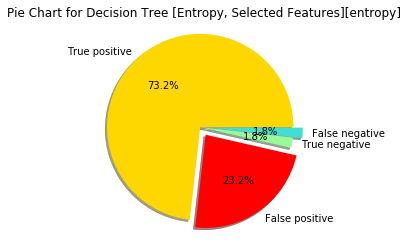

In [48]:
##here's a friendly picture 
print ("pie chart of true positive, false positive , false_negative, true_negative for DECISION TREE ")

true_positive = predictions_entropy_02.where("prediction = 1 AND Class = 1").count()
false_positive = predictions_entropy_02.where("prediction = 1 AND Class = 0").count()
false_negative = predictions_entropy_02.where("prediction = 0 AND Class = 1").count()
true_negative = predictions_entropy_02.where("prediction = 0 AND Class = 0").count()

#print(true_positive)
#print(false_positive)
#print(false_negative)
#print(true_negative)


%matplotlib inline
import matplotlib.pyplot as plt
labels = ['True positive', 'False positive', 'True negative', 'False negative']
sizes = [ true_positive , false_positive ,false_negative , true_negative ]
#colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
colors = ['gold', 'red', 'palegreen', 'turquoise' ]
explode =(0,0.1,0,0.1) 
plt.title("Pie Chart for Decision Tree [Entropy, Selected Features][entropy]", fontsize = 12) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,explode=explode,shadow = True)
plt.axis('equal')

### END DECISION TREE I TUNING I

### STOP DECISION TREE

In [49]:
#Optional - try and see if possible to tune maxbins and maxdepths for DT with selected features
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
#from mmlspark import ComputeModelStatistics
##TOME

##START###
input_cols_03 = [e for e in liver_df04_noGender.columns if e != 'Class']
#print (type(input_cols))
featuresCreator_entropyTune = ft.VectorAssembler(inputCols=input_cols_03, outputCol="features")



dt_entropyTune = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 
pipeline_entropyTune = Pipeline( stages = [featuresCreator_entropyTune, dt_entropyTune] )

# Create ParamGrid for Cross Validation
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt_entropyTune.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dt_entropyTune.maxBins, [10, 20, 40, 80, 100])
             .build())

# Evaluate model
#dtevaluator = ev.BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
dtevaluator = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")


# Create 5-fold CrossValidator
dtcv = CrossValidator(estimator = pipeline_entropyTune,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = dtevaluator,
                      numFolds = 5)




#training_data02, testing_data02 
# Run cross validations
dtcvModel = dtcv.fit(training_data02)
print(dtcvModel)

# Use test set here so we can measure the accuracy of our model on new data
dtpredictions = dtcvModel.transform(testing_data02)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy:', dtevaluator.evaluate(dtpredictions))
print('AUC:', BinaryClassificationMetrics(dtpredictions['Class','prediction'].rdd).areaUnderROC)
#ComputeModelStatistics().transform(dtpredictions)

#dtcvModel.getEvaluator().extractParamMap()




CrossValidatorModel_a9f55ed605a3
Accuracy: 0.6880196523053665
AUC: 0.6677018633540373


In [50]:
#Let's try LR 

### Evaluating the Logistic Regression II
Now we evaluate the logistric regression model and see if this offers improvement on the decision tree 


In [51]:
liver_df04_noGender.show(5)

+----+---+-------+----+-----+---+-----+
| Age| DB|Alkphos|Sgpt| Sgot|ALB|Class|
+----+---+-------+----+-----+---+-----+
|65.0|0.1|  187.0|16.0| 18.0|3.3|  1.0|
|62.0|5.5|  699.0|64.0|100.0|3.2|  1.0|
|62.0|4.1|  490.0|60.0| 68.0|3.3|  1.0|
|58.0|0.4|  182.0|14.0| 20.0|3.4|  1.0|
|72.0|2.0|  195.0|27.0| 59.0|2.4|  1.0|
+----+---+-------+----+-----+---+-----+
only showing top 5 rows



In [52]:
#train_data_LR, test_data_LR = liver_df04_noGender.randomSplit([0.7, 0.3], seed=1)
#train_data_LR.persist()

#training_data02,testing_data02

featuresCreator_LR = ft.VectorAssembler(inputCols=["Age",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot",
                                                "ALB"], 
                                                outputCol='features')

lr = cl.LogisticRegression(regParam=0.01, maxIter=50, elasticNetParam=0.01, labelCol="Class")
pipeline_LR = Pipeline( stages = [featuresCreator_LR, lr] )                                                



model_LR = pipeline_LR.fit(training_data02)
predictions_LR = model_LR.transform(testing_data02)
evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
print(evaluator_LR.evaluate(predictions_LR, {evaluator_LR.metricName: 'areaUnderROC'}))

# orig LR = 0.7630385487528344  with min. no. of features 

0.7630385487528344


In [53]:
predictions_LR.show(5)

+----+----+-------+-----+------+---+-----+--------------------+--------------------+--------------------+----------+
| Age|  DB|Alkphos| Sgpt|  Sgot|ALB|Class|            features|       rawPrediction|         probability|prediction|
+----+----+-------+-----+------+---+-----+--------------------+--------------------+--------------------+----------+
| 7.0|11.8| 1420.0|790.0|1050.0|2.0|  1.0|[7.0,11.8,1420.0,...|[-12.715414634773...|[3.00444518024007...|       1.0|
|13.0| 0.1|  182.0| 24.0|  19.0|4.9|  1.0|[13.0,0.1,182.0,2...|[0.68602156921425...|[0.66508132142763...|       0.0|
|15.0| 0.2|  380.0| 25.0|  66.0|3.7|  1.0|[15.0,0.2,380.0,2...|[-0.2255555049128...|[0.44384898042534...|       1.0|
|16.0| 1.2|  236.0|131.0|  90.0|2.6|  1.0|[16.0,1.2,236.0,1...|[-0.9316417807941...|[0.28259175151647...|       1.0|
|17.0| 0.1|  206.0| 28.0|  21.0|4.5|  0.0|[17.0,0.1,206.0,2...|[0.45896977456288...|[0.61276974959253...|       0.0|
+----+----+-------+-----+------+---+-----+--------------------+-

(-1.1171076643822837,
 1.2037501958925267,
 -1.2244245058230088,
 1.112941939043226)

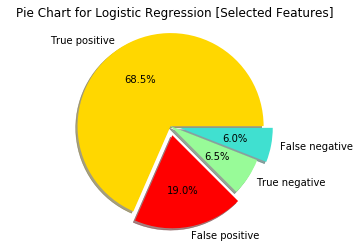

In [54]:
##plot the no. of scucuceess 
predictions_LR.columns
numSuccesses = predictions_LR.where("(prediction = 0 AND Class = '0') OR (prediction = 1 AND (Class = '1'))").count()
numPredictions = predictions_LR.count()
#print(numSuccesses)
#print(numInspections)

true_positive = predictions_LR.where("prediction = 1 AND Class = '1'").count()
false_positive = predictions_LR.where("prediction = 1 AND Class = '0'").count()
false_negative = predictions_LR.where("prediction = 0 AND Class = '1'").count()
true_negative = predictions_LR.where("prediction = 0 AND Class = '0'").count()

#print(true_positive)
#print(false_positive)
#print(false_negative)
#print(true_negative)



import matplotlib.pyplot as plt
%matplotlib inline


labels = ['True positive', 'False positive', 'True negative', 'False negative']
sizes = [ true_positive , false_positive ,false_negative , true_negative ]
#colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
colors = ['gold', 'red', 'palegreen', 'turquoise' ]
explode =(0,0.1,0,0.1) 
plt.title("Pie Chart for Logistic Regression [Selected Features]", fontsize = 12) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,explode =explode,shadow = True)
plt.axis('equal')



In [55]:
#runs a no. of runs through a ParamGrid Builder to find out the optinium of params for LR 
lr = cl.LogisticRegression(regParam=0.01, maxIter=50, elasticNetParam=0.01, labelCol="Class")
evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")

#training_data02,testing_data02
featuresCreator_LR = ft.VectorAssembler(inputCols=["Age",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot",
                                                "ALB"], 
                                                outputCol='features')
pipeline_LR = Pipeline( stages = [featuresCreator_LR, lr] ) 


from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,5,10])\
    .addGrid(lr.elasticNetParam,[0.01, 0.5, 1.0])\
    .addGrid(lr.fitIntercept,[False, True])\
    .addGrid(lr.maxIter,[10, 100, 1000])\
    .addGrid(lr.regParam,[0.01, 0.5, 2.0]) \
    .build()

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=pipeline_LR, estimatorParamMaps=paramGrid, evaluator=evaluator_LR, numFolds=5)

# Run cross validations
cvModel = cv.fit(training_data02)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(training_data02)
predict_test=cvModel.transform(testing_data02)
#cV auto uses the best model - find out the ROC 
#by default it is using ROC for BinaryClassificationEvaluator
print("The area under ROC for train set after CV  is {}".format(evaluator_LR.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator_LR.evaluate(predict_test)))
#The area under ROC for train set after CV  is 0.7543448275862064
#The area under ROC for test set after CV  is 0.7501889644746786

#selected = predict_test.select("Class", "probability", "prediction")
#for row in selected.collect():
#    print(row)

    
bestModel = cvModel.bestModel                    ##Getting the best model
print (  bestModel )


The area under ROC for train set after CV  is 0.7543448275862064
The area under ROC for test set after CV  is 0.7501889644746786
PipelineModel_a4f0d92b63c6


In [56]:
#gets the params for the best model for Logistic Regression
param_dict = bestModel.stages[-1].extractParamMap()
#bestLRModel = bestModel.stages[2]
#bestParams = bestLRModel.extractParamMap()
sane_dict = {}
for k, v in param_dict.items():
  #print ("k.name >> "+ k.name )
  sane_dict[k.name] = v

best_reg = sane_dict["regParam"]
best_elastic_net = sane_dict["elasticNetParam"]
best_max_iter = sane_dict["maxIter"]

In [57]:
print("Best best_reg ... " +str(best_reg))
print("Best best_elastic_net... " + str (best_elastic_net)) 
print("Best maxIter..." + str (best_max_iter)) 


Best best_reg ... 0.01
Best best_elastic_net... 0.01
Best maxIter...100


We conclude the best params is 
Best regParam = 0.01
Best best_elastic_net = 0.01
Best maxIter = 100


In [58]:
#redo the LR with best params
#train_data_LR, test_data_LR = liver_df04_noGender.randomSplit([0.7, 0.3], seed=1)
#train_data_LR.persist()

#training_data02,testing_data02
featuresCreator_LR = ft.VectorAssembler(inputCols=["Age",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot",
                                                "ALB"], 
                                                outputCol='features')

lr = cl.LogisticRegression(regParam=0.01, maxIter=100, elasticNetParam=0.01, labelCol="Class")
pipeline_LR = Pipeline( stages = [featuresCreator_LR, lr] )                                                



model_LR = pipeline_LR.fit(training_data02)
predictions_LR = model_LR.transform(testing_data02)
evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
print("Rerunning with tuned parameters....")
print(evaluator_LR.evaluate(predictions_LR, {evaluator_LR.metricName: 'areaUnderROC'}))

Rerunning with tuned parameters....
0.7639833711262282


In [59]:
#Seems like runing the parameters does not give a better prediction
## continue with original dataset

In [60]:
#we use the best params for whole dataset 
#with original dataset 
#TRACKME

#training_data, testing_data  are the original ds 
print("Rerunning with tuned parameters for full features....")
featuresCreator_LR = ft.VectorAssembler(inputCols=["Age", "TB",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot", "TP",
                                                "ALB", "newAGRatio"], 
                                                outputCol='features')

lr = cl.LogisticRegression(regParam=0.01, maxIter=100, elasticNetParam=0.01, labelCol="Class")
pipeline_LR = Pipeline( stages = [featuresCreator_LR, lr] )                                                



model_LR = pipeline_LR.fit(training_data)
predictions_LR = model_LR.transform(testing_data)
evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
#print( "ROC for this round " + str( evaluator_LR.evaluate(test_model_LR, {evaluator.metricName: 'areaUnderROC'}))
aoc= evaluator_LR.evaluate(predictions_LR, {evaluator_LR.metricName: 'areaUnderROC'}) 

#print( str(  evaluator_LR.evaluate(predictions_LR, {evaluator.metricName: 'areaUnderROC'}))       
print("areaUnderROC under LR = %.2f" %aoc)     
aoc  
#print ( type( evaluator_LR.evaluate(predictions_LR, {evaluator.metricName: 'areaUnderROC'}) )) 
# 0.7630385487528344  


#predictions = lrModel.transform(test)

#predict_train=model_LR.transform(train_data_LR)
#predict_test=model_LR.transform(test_data_LR)
#predict_test.show(20)
#predict_test.select("Class","prediction","probability").show(10)



#print("The area under ROC for train set is {}".format(evaluator_LR.evaluate(predict_train)))
#print("The area under ROC for test set is {}".format(evaluator_LR.evaluate(predict_test)))
#predictions_LR.show(5)
#from IPython.display import display
#display(model_LR, predictions_LR, "ROC")





Rerunning with tuned parameters for full features....
areaUnderROC under LR = 0.79


0.7882890803587126

In [61]:
evaluator_LR.explainParams()

'labelCol: label column name. (default: label, current: Class)\nmetricName: metric name in evaluation (areaUnderROC|areaUnderPR) (default: areaUnderROC)\nrawPredictionCol: raw prediction (a.k.a. confidence) column name. (default: rawPrediction, current: probability)'

In [62]:
#optional we try to get acc , f1, weightPrecision, weightRecall, auc through different ClassClassifitcation
from sklearn.metrics import roc_curve,auc
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndTarget = predictions_LR.select("Class", "prediction")

evaluatorMulti = ev.MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
##evaluator = ev.BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="rawPrediction", predictionCol="prediction", metricName='areaUnderROC')

evaluator = ev.BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="prediction", metricName='areaUnderROC')


# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)

print (acc)
print (f1)
print (weightedPrecision)
print (weightedRecall)
print (auc)

0.75
0.7051930147058825
0.7295481106349825
0.75
0.5922278881659927


(-1.117089423782036,
 1.2033671432873232,
 -1.2275317595693132,
 1.1130899035073358)

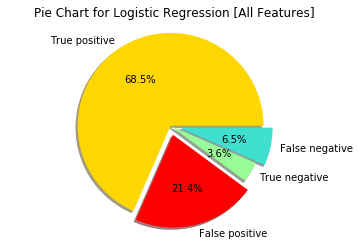

In [63]:
##plot the no. of scucuceess 
predictions_LR.columns
numSuccesses = predictions_LR.where("(prediction = 0 AND Class = '0') OR (prediction = 1 AND (Class = '1'))").count()
numPredictions = predictions_LR.count()
#print(numSuccesses)
#print(numInspections)

true_positive = predictions_LR.where("prediction = 1 AND Class = '1'").count()
false_positive = predictions_LR.where("prediction = 1 AND Class = '0'").count()
false_negative = predictions_LR.where("prediction = 0 AND Class = '1'").count()
true_negative = predictions_LR.where("prediction = 0 AND Class = '0'").count()

#print(true_positive)
#print(false_positive)
#print(false_negative)
#print(true_negative)



import matplotlib.pyplot as plt
%matplotlib inline


labels = ['True positive', 'False positive', 'True negative', 'False negative']
sizes = [ true_positive , false_positive ,false_negative , true_negative ]
#colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
colors = ['gold', 'red', 'palegreen', 'turquoise' ]
explode =(0,0.1,0,0.1) 
plt.title("Pie Chart for Logistic Regression [All Features]", fontsize = 12) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,explode =explode,shadow = True)
plt.axis('equal')

#### LR params that work best = regParam=0.01, maxIter=50, elasticNetParam=0.01, labelCol="Class") for selected features
#### In short We got a 0.78 for LR with the original dataset (no dropping of corelations ) but the multiclassEvluator etc gives a 0.76 instead

### End the Logistic Regression II 

### Evaluating the Random Forest Model


In [64]:
#Let's do a RF 
liver_df04_noGender.show(5)

+----+---+-------+----+-----+---+-----+
| Age| DB|Alkphos|Sgpt| Sgot|ALB|Class|
+----+---+-------+----+-----+---+-----+
|65.0|0.1|  187.0|16.0| 18.0|3.3|  1.0|
|62.0|5.5|  699.0|64.0|100.0|3.2|  1.0|
|62.0|4.1|  490.0|60.0| 68.0|3.3|  1.0|
|58.0|0.4|  182.0|14.0| 20.0|3.4|  1.0|
|72.0|2.0|  195.0|27.0| 59.0|2.4|  1.0|
+----+---+-------+----+-----+---+-----+
only showing top 5 rows



In [65]:
# Split the data into training and test sets (30% held out for testing)
#generate with  selected first 
print("RF with SELECTED features")
#(trainingData, testData) = liver_df04_noGender.randomSplit([0.7, 0.3], seed=1)
#trainingData.persist()

featuresCreator_RF= ft.VectorAssembler(inputCols=["Age",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot",
                                                "ALB"], 
                                                outputCol='features')
#rf = cl.RandomForestClassifier(numTrees=50,labelCol="Class", maxDepth=27)

# Train a RandomForest model.
rf = cl.RandomForestClassifier(labelCol="Class", maxDepth=10, numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline_RF = Pipeline(stages=[ featuresCreator_RF, rf ])

# Train model.  This also runs the indexers.
model = pipeline_RF.fit(training_data02)

# Make predictions.
predictions = model.transform(testing_data02)

print(predictions.columns)
# Select example rows to display.
predictions.select("Class", "prediction", "probability").show(5)

# Select (prediction, true label) and compute test error
#evaluator = ev.MulticlassClassificationEvaluator( labelCol="Class", predictionCol="prediction", metricName="accuracy")
evaluator = ev.BinaryClassificationEvaluator(labelCol='Class', metricName='areaUnderROC')


accuracy = evaluator.evaluate(predictions)
print("areaUnderROC [selected Features ]= %g" % (accuracy))
#print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[1]
#print(rfModel.toDebugString)  # summary only


RF with SELECTED features
['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB', 'Class', 'features', 'rawPrediction', 'probability', 'prediction']
+-----+----------+--------------------+
|Class|prediction|         probability|
+-----+----------+--------------------+
|  1.0|       1.0|           [0.2,0.8]|
|  1.0|       1.0|[0.47037037037037...|
|  1.0|       1.0|[0.37502153316106...|
|  1.0|       1.0|           [0.3,0.7]|
|  0.0|       0.0|[0.58287037037037...|
+-----+----------+--------------------+
only showing top 5 rows

areaUnderROC [selected Features ]= 0.743953


In [66]:
liver_df03_noGender.show()

+----+----+---+-------+-----+-----+---+---+-----+----------+
| Age|  TB| DB|Alkphos| Sgpt| Sgot| TP|ALB|Class|newAGRatio|
+----+----+---+-------+-----+-----+---+---+-----+----------+
|65.0| 0.7|0.1|  187.0| 16.0| 18.0|6.8|3.3|  1.0|       0.9|
|62.0|10.9|5.5|  699.0| 64.0|100.0|7.5|3.2|  1.0|      0.74|
|62.0| 7.3|4.1|  490.0| 60.0| 68.0|7.0|3.3|  1.0|      0.89|
|58.0| 1.0|0.4|  182.0| 14.0| 20.0|6.8|3.4|  1.0|       1.0|
|72.0| 3.9|2.0|  195.0| 27.0| 59.0|7.3|2.4|  1.0|       0.4|
|46.0| 1.8|0.7|  208.0| 19.0| 14.0|7.6|4.4|  1.0|       1.3|
|26.0| 0.9|0.2|  154.0| 16.0| 12.0|7.0|3.5|  1.0|       1.0|
|29.0| 0.9|0.3|  202.0| 14.0| 11.0|6.7|3.6|  1.0|       1.1|
|17.0| 0.9|0.3|  202.0| 22.0| 19.0|7.4|4.1|  0.0|       1.2|
|55.0| 0.7|0.2|  290.0| 53.0| 58.0|6.8|3.4|  1.0|       1.0|
|57.0| 0.6|0.1|  210.0| 51.0| 59.0|5.9|2.7|  1.0|       0.8|
|72.0| 2.7|1.3|  260.0| 31.0| 56.0|7.4|3.0|  1.0|       0.6|
|64.0| 0.9|0.3|  310.0| 61.0| 58.0|7.0|3.4|  0.0|       0.9|
|74.0| 1.1|0.4|  214.0| 

In [67]:
## DO A RF with all the features 
print("RF with all the features")

#training_data, testing_data 

featuresCreator_RF= ft.VectorAssembler(inputCols=["Age", "TB",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot","TP",
                                                "ALB","newAGRatio"], 
                                                outputCol='features')
#rf = cl.RandomForestClassifier(numTrees=50,labelCol="Class", maxDepth=27)

# Train a RandomForest model.
rf = cl.RandomForestClassifier(labelCol="Class", maxDepth=10, numTrees=10)



# Chain indexers and forest in a Pipeline
pipeline_RF = Pipeline(stages=[ featuresCreator_RF, rf ])

# Train model. 
model = pipeline_RF.fit(training_data)

# Make predictions.
predictions = model.transform(testing_data)

print(predictions.columns)
# Select example rows to display.
#predictions.select("Class", "prediction", "probability").show(5)

# Select (prediction, true label) and compute test error
#evaluator = ev.MulticlassClassificationEvaluator( labelCol="Class", predictionCol="prediction", metricName="accuracy")
evaluator = ev.BinaryClassificationEvaluator(labelCol='Class', metricName='areaUnderROC')


aoc = evaluator.evaluate(predictions)
print("areaUnderROC [full features] = %g" % (aoc))
#print("Test Error = %g" % (1.0 - accuracy))

RF with all the features
['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'Class', 'newAGRatio', 'features', 'rawPrediction', 'probability', 'prediction']
areaUnderROC [full features] = 0.683577


In [68]:
#random forest with trees 

We conclude that RF (selected features) gives AOC= 0.743953 is a better one 

### End Evaluating the Random Forest Model


In [69]:
liver_df04_noGender.columns

['Age', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB', 'Class']

In [70]:
#TRACKME
print (" Optional -taking into Gender and one-hot-encoding Gendre to try with FULL features")

liver05_justForOneHot = liver_df02_t.drop("new_id").drop("AGRatio")
#Decision tree with one-hot encoding with original DS 
#selectedCols = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 

import pyspark.ml.feature as ft

gender_indexer = ft.StringIndexer(inputCol="Gender", outputCol="Gender-num")
gender_encoder = ft.OneHotEncoder(inputCol="Gender-num", outputCol='Gender-num-vec')

featuresCreator3 = ft.VectorAssembler(inputCols=["Gender-num-vec","TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"], outputCol='features')




import pyspark.ml.regression as reg
dr3 = reg.DecisionTreeRegressor(labelCol="Class")


from pyspark.ml import Pipeline

#[gender_indexer,gender_encoder,
#featuresCreator3, dr3] )

pipeline3 = Pipeline( stages = [gender_indexer,gender_encoder,
                               featuresCreator3, dr3] )

train_data3, test_data3 = liver05_justForOneHot.randomSplit([0.7, 0.3], seed=1)
train_data3.persist()

model3 = pipeline3.fit(train_data3)

predictions3 = model3.transform(test_data3)
#evaluator3 = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", 
#                                                 metricName="accuracy")
evaluator3 = ev.BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="Class")


accuracy3 = evaluator3.evaluate(predictions3)
print(accuracy3)

predictions3.show(10)

 Optional -taking into Gender and one-hot-encoding Gendre to try with FULL features
0.6702712609970675
+----+------+---+---+-------+-----+-----+---+---+-----+----------+----------+--------------+--------------------+------------------+
| Age|Gender| TB| DB|Alkphos| Sgpt| Sgot| TP|ALB|Class|newAGRatio|Gender-num|Gender-num-vec|            features|        prediction|
+----+------+---+---+-------+-----+-----+---+---+-----+----------+----------+--------------+--------------------+------------------+
| 7.0|  Male|0.5|0.1|  352.0| 28.0| 51.0|7.9|4.2|  0.0|       1.1|       0.0| (1,[0],[1.0])|[1.0,0.5,0.1,352....|              0.64|
|13.0|Female|0.7|0.1|  182.0| 24.0| 19.0|8.9|4.9|  1.0|       1.2|       1.0|     (1,[],[])|[0.0,0.7,0.1,182....|0.2826086956521739|
|15.0|  Male|0.8|0.2|  380.0| 25.0| 66.0|6.1|3.7|  1.0|       1.5|       0.0| (1,[0],[1.0])|[1.0,0.8,0.2,380....|              0.64|
|16.0|  Male|2.6|1.2|  236.0|131.0| 90.0|5.4|2.6|  1.0|       0.9|       0.0| (1,[0],[1.0])|[1.0,2.

In [71]:
liver05_justForOneHot.show(5)
#liver_df02_t.drop("new_id").drop("AGRatio").drop ("TP").drop("newAGRatio").drop("TB")
#liver05_justForOneHot = liver_df02_t.drop("new_id").drop("AGRatio")
liver05_justForOneHot = liver_df02_t.drop("new_id").drop("AGRatio").drop ("TP").drop("newAGRatio").drop("TB")

print (" Optional -taking into Gender and one-hot-encoding Gendre to try with SELECTED features")
#Decision tree with one-hot encoding with original DS 
#selectedCols = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 

import pyspark.ml.feature as ft

gender_indexer = ft.StringIndexer(inputCol="Gender", outputCol="Gender-num")
gender_encoder = ft.OneHotEncoder(inputCol="Gender-num", outputCol='Gender-num-vec')


featuresCreator3 = ft.VectorAssembler(inputCols=["Gender-num-vec","DB", "Alkphos", "Sgpt","Sgot", "ALB"], outputCol='features')

import pyspark.ml.classification as cl
#dt = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 
dr3 = cl.DecisionTreeClassifier(labelCol="Class")


from pyspark.ml import Pipeline
pipeline3 = Pipeline( stages = [gender_indexer,gender_encoder,
                               featuresCreator3, dr3] )

train_data3, test_data3 = liver05_justForOneHot.randomSplit([0.7, 0.3], seed=1)
train_data3.persist()
test_data3.persist()

model3 = pipeline3.fit(train_data3)

predictions3 = model3.transform(test_data3)
#evaluator3 = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")

evaluator3 = ev.BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="Class")

accuracy3 = evaluator3.evaluate(predictions3)
print(accuracy3)

+----+------+----+---+-------+----+-----+---+---+-----+----------+
| Age|Gender|  TB| DB|Alkphos|Sgpt| Sgot| TP|ALB|Class|newAGRatio|
+----+------+----+---+-------+----+-----+---+---+-----+----------+
|65.0|Female| 0.7|0.1|  187.0|16.0| 18.0|6.8|3.3|  1.0|       0.9|
|62.0|  Male|10.9|5.5|  699.0|64.0|100.0|7.5|3.2|  1.0|      0.74|
|62.0|  Male| 7.3|4.1|  490.0|60.0| 68.0|7.0|3.3|  1.0|      0.89|
|58.0|  Male| 1.0|0.4|  182.0|14.0| 20.0|6.8|3.4|  1.0|       1.0|
|72.0|  Male| 3.9|2.0|  195.0|27.0| 59.0|7.3|2.4|  1.0|       0.4|
+----+------+----+---+-------+----+-----+---+---+-----+----------+
only showing top 5 rows

 Optional -taking into Gender and one-hot-encoding Gendre to try with SELECTED features
0.5443548387096775


In [72]:
#full set with all fields 
liver05_justForOneHot.show(5)
#liver_df02_t.drop("new_id").drop("AGRatio").drop ("TP").drop("newAGRatio").drop("TB")
#liver05_justForOneHot = liver_df02_t.drop("new_id").drop("AGRatio")
liver05_justForOneHot = liver_df02_t.drop("new_id").drop("AGRatio").drop ("TP").drop("newAGRatio").drop("TB")


#Decision tree with one-hot encoding with original DS 

#selectedCols = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 

import pyspark.ml.feature as ft

gender_indexer = ft.StringIndexer(inputCol="Gender", outputCol="Gender-num")


featuresCreator3 = ft.VectorAssembler(inputCols=["Gender-num","DB", "Alkphos", "Sgpt","Sgot", "ALB"], outputCol='features')

print(type(featuresCreator3))

import pyspark.ml.classification as cl
#dt = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 
dr3 = cl.DecisionTreeClassifier(labelCol="Class")


from pyspark.ml import Pipeline
pipeline3 = Pipeline( stages = [gender_indexer,
                               featuresCreator3, dr3] )

train_data3, test_data3 = liver05_justForOneHot.randomSplit([0.7, 0.3], seed=1)
train_data3.persist()
test_data3.persist() 

model3 = pipeline3.fit(train_data3)

predictions3 = model3.transform(test_data3)
#evaluator3 = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")

evaluator3 = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
accuracy3 = evaluator3.evaluate(predictions3)


print(accuracy3)

+----+------+---+-------+----+-----+---+-----+
| Age|Gender| DB|Alkphos|Sgpt| Sgot|ALB|Class|
+----+------+---+-------+----+-----+---+-----+
|65.0|Female|0.1|  187.0|16.0| 18.0|3.3|  1.0|
|62.0|  Male|5.5|  699.0|64.0|100.0|3.2|  1.0|
|62.0|  Male|4.1|  490.0|60.0| 68.0|3.3|  1.0|
|58.0|  Male|0.4|  182.0|14.0| 20.0|3.4|  1.0|
|72.0|  Male|2.0|  195.0|27.0| 59.0|2.4|  1.0|
+----+------+---+-------+----+-----+---+-----+
only showing top 5 rows

<class 'pyspark.ml.feature.VectorAssembler'>
0.6862170087976539


In [73]:
#Means that gender does not play a part in the ML in this dataset 
#Try with outlier remove 

### Optional : START Try doing a DT with outliers remove in "TB"

In [74]:
#try with outlier remove 
#
numerical_columns_features = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 
for i in numerical_columns_features: 
    #liver_df02_t.describe(i).show()
    quantiles_F = liver_df02_t.approxQuantile(i, [0.25, 0.75], 0.05)
    #print ( str(quantiles_F) + "..."+i + "..." )
    IQR_F = quantiles_F[1] - quantiles_F[0]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F))
    bounds_F = [ quantiles_F[0] - 1.5 * IQR_F, quantiles_F[1] + 1.5 * IQR_F ]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F)+ "...bounds_F[0]"+ str(bounds_F[0])+"..bounds_F[1]" + str(bounds_F[1]))
    #liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).show()
    no_outliers_F = liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).count() 
    print( "No. of outliers for column ["+i+"] > " + str(no_outliers_F) ) 

#get outliers for TB
quantiles_TB = liver_df02_t.approxQuantile("TB", [0.25, 0.75], 0.05)
print ( quantiles_TB )
IQR_TB = quantiles_TB[1] - quantiles_TB[0]
boundsTB = [ quantiles_TB[0] - 1.5 * IQR_TB, quantiles_TB[1] + 1.5 * IQR_TB ]
##show those records that are outliers for TB 
liver_df04_dropOutliersTB = liver_df02_t.filter( (boundsTB[0] <=liver_df02_t.TB ) & ( liver_df02_t.TB <= boundsTB[1]) )



No. of outliers for column [TB] > 98
No. of outliers for column [DB] > 96
No. of outliers for column [Alkphos] > 77
No. of outliers for column [Sgpt] > 80
No. of outliers for column [Sgot] > 80
No. of outliers for column [TP] > 8
No. of outliers for column [ALB] > 2
No. of outliers for column [newAGRatio] > 10
[0.8, 2.1]


Aftering drop TB Outliers 485
[0.2, 0.6]
No. of outliers for column [TB] > 202
No. of outliers for column [DB] > 207
No. of outliers for column [Alkphos] > 104
No. of outliers for column [Sgpt] > 105
No. of outliers for column [Sgot] > 125
No. of outliers for column [TP] > 15
No. of outliers for column [ALB] > 5
No. of outliers for column [newAGRatio] > 26
Aftering drop TB Outliers 435
No. of outliers for column [TB] > 202
No. of outliers for column [DB] > 207
No. of outliers for column [Alkphos] > 104
No. of outliers for column [Sgpt] > 105
No. of outliers for column [Sgot] > 125
No. of outliers for column [TP] > 15
No. of outliers for column [ALB] > 5
No. of outliers for column [newAGRatio] > 26


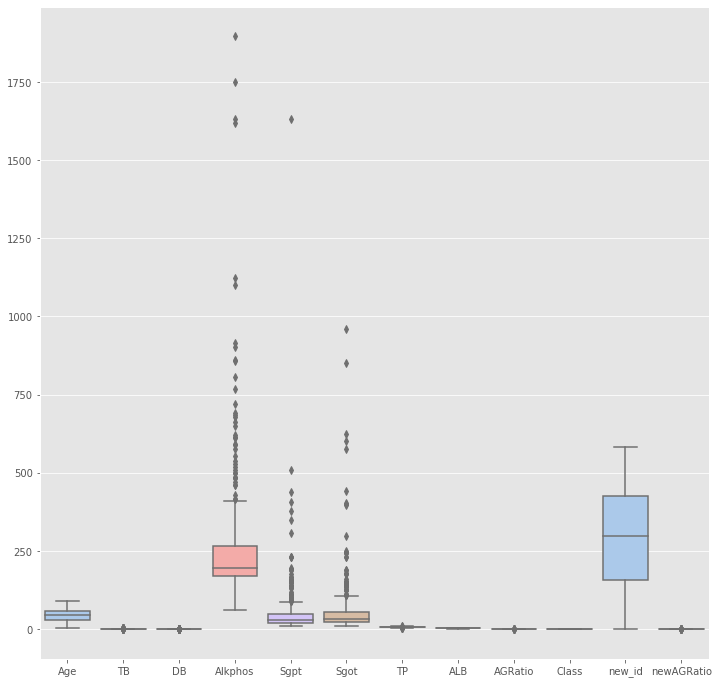

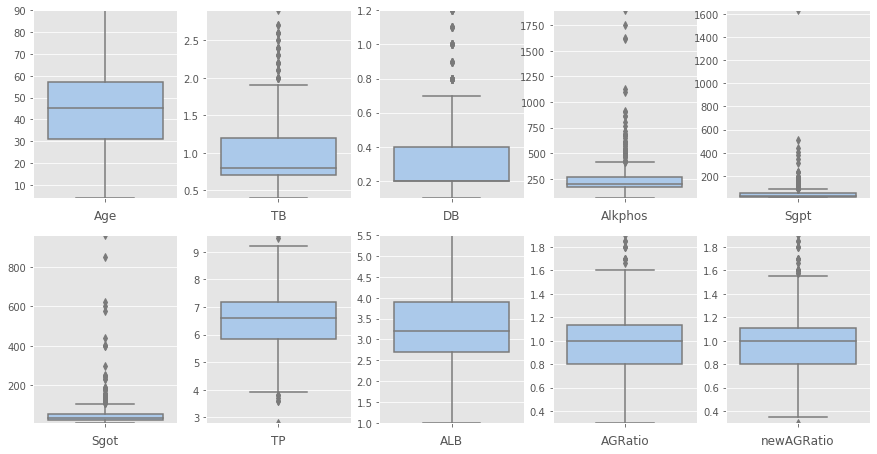

In [75]:
type(liver_df04_dropOutliersTB.count())
print ( "Aftering drop TB Outliers " + str (liver_df04_dropOutliersTB.count()) )

#get outliers for DB
quantiles_DB = liver_df04_dropOutliersTB.approxQuantile("DB", [0.25, 0.75], 0.05)
print ( quantiles_DB )
IQR_DB = quantiles_DB[1] - quantiles_DB[0]
boundsDB = [ quantiles_DB[0] - 1.5 * IQR_DB, quantiles_DB[1] + 1.5 * IQR_DB ]
##show those records that are outliers for TB 
liver_df04_dropOutliersTB = liver_df04_dropOutliersTB.filter( (boundsDB[0] <=liver_df02_t.DB ) & ( liver_df02_t.DB <= boundsDB[1]) )




numerical_columns_features = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 
for i in numerical_columns_features: 
    #liver_df02_t.describe(i).show()
    quantiles_F = liver_df04_dropOutliersTB.approxQuantile(i, [0.25, 0.75], 0.05)
    #print ( str(quantiles_F) + "..."+i + "..." )
    IQR_F = quantiles_F[1] - quantiles_F[0]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F))
    bounds_F = [ quantiles_F[0] - 1.5 * IQR_F, quantiles_F[1] + 1.5 * IQR_F ]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F)+ "...bounds_F[0]"+ str(bounds_F[0])+"..bounds_F[1]" + str(bounds_F[1]))
    #liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).show()
    no_outliers_F = liver_df02_t.filter( (liver_df04_dropOutliersTB[i] < bounds_F[0]) | (liver_df04_dropOutliersTB[i] > bounds_F[1]) ).count() 
    print( "No. of outliers for column ["+i+"] > " + str(no_outliers_F) ) 



type(liver_df04_dropOutliersTB.count())
print ( "Aftering drop TB Outliers " + str (liver_df04_dropOutliersTB.count()) )



numerical_columns_features = [ "TB","DB", "Alkphos", "Sgpt","Sgot","TP" , "ALB", "newAGRatio"] 
for i in numerical_columns_features: 
    #liver_df02_t.describe(i).show()
    quantiles_F = liver_df04_dropOutliersTB.approxQuantile(i, [0.25, 0.75], 0.05)
    #print ( str(quantiles_F) + "..."+i + "..." )
    IQR_F = quantiles_F[1] - quantiles_F[0]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F))
    bounds_F = [ quantiles_F[0] - 1.5 * IQR_F, quantiles_F[1] + 1.5 * IQR_F ]
    #print ( str(quantiles_F) + "..."+i + "...IQR_F"+  str(IQR_F)+ "...bounds_F[0]"+ str(bounds_F[0])+"..bounds_F[1]" + str(bounds_F[1]))
    #liver_df02_t.filter( (liver_df02_t[i] < bounds_F[0]) | (liver_df02_t[i] > bounds_F[1]) ).show()
    no_outliers_F = liver_df02_t.filter( (liver_df04_dropOutliersTB[i] < bounds_F[0]) | (liver_df04_dropOutliersTB[i] > bounds_F[1]) ).count() 
    print( "No. of outliers for column ["+i+"] > " + str(no_outliers_F) ) 

#lets play woith some box plots 
plt.figure(figsize=(12,12))
liver02P = liver_df04_dropOutliersTB.toPandas()
sns.boxplot(data=liver02P,palette='pastel')
#sns.palplot(sns.color_palette("RdBu", 10))
##cols = liver_df02_t.select("Age", "Sgot","TP").toPandas()
cols = ["Age" ,"TB" ,"DB" ,"Alkphos" ,"Sgpt" ,"Sgot" ,"TP" ,"ALB", "AGRatio", "newAGRatio"] 
q=1
plt.figure(figsize=(15,20))
#fig, axes = plt.subplots(1, len(cols))

for col in cols:
   plt.subplot(5,5,q)
   ##ax = sns.boxplot(liver02P[col],color='red')
   ax = sns.boxplot(y=liver02P[col],palette='pastel')
   ax.set_ylim(liver02P[col].min(), liver02P[col].max())
   #ax = sns.boxplot(y=liver02P[col], ax=axes.flatten()[i])
   #ax.set_ylim( y=liver02P[col].min(), y=liver02P[col].max())
   ax.set_ylabel('')
   plt.xlabel(col)
   q+=1
plt.show()

In [76]:
#drop gender and do the decision tree 
liver_df04_dropOutliersTB_X = liver_df04_dropOutliersTB.drop("Gender").drop("new_id").drop("AGRatio")

dt_training_data, dt_test_data = liver_df04_dropOutliersTB_X.randomSplit([0.7, 0.3], seed=1)
dt_training_data.persist()
dt_test_data.persist() 

import pyspark.ml.feature as ft

featuresCreator = ft.VectorAssembler(inputCols=input_cols, outputCol="features")


import pyspark.ml.classification as cl

dt = cl.DecisionTreeClassifier(labelCol="Class",impurity="entropy") 
predictions_dt = model_dt.transform(dt_test_data)

print (predictions_dt.columns)
predictions_dt.select("Class", "rawPrediction", "probability", "prediction").show(truncate=False)

import pyspark.ml.evaluation as ev
#evaluator_dt = ev.MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class", metricName="accuracy")


evaluator_dt = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")


accuracy_dt = evaluator_dt.evaluate(predictions_dt)
print( dt.getImpurity()) 
print( "Accuracy After Dropping TB Outlier > " + str(accuracy_dt))

['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'Class', 'newAGRatio', 'features', 'rawPrediction', 'probability', 'prediction']
+-----+-------------+---------------------------------------+----------+
|Class|rawPrediction|probability                            |prediction|
+-----+-------------+---------------------------------------+----------+
|1.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|1.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830601]|1.0       |
|1.0  |[20.0,54.0]  |[0.2702702702702703,0.7297297297297297]|1.0       |
|1.0  |[1.0,24.0]   |[0.04,0.96]                            |1.0       |
|0.0  |[85.0,98.0]  |[0.4644808743169399,0.5355191256830

### Optional : END Try doing a DT with outliers remove in "TB"

In [77]:
#run a LR with 
dt_training_data.persist()
dt_test_data.persist() 

print( "Accuracy After Dropping TB Outlier > LR [selected features]...")

featuresCreator_LR = ft.VectorAssembler(inputCols=["Age",
                                                "DB", "Alkphos",
                                                "Sgpt", "Sgot",
                                                "ALB"], 
                                                outputCol='features')

lr = cl.LogisticRegression(regParam=0.01, maxIter=100, elasticNetParam=0.01, labelCol="Class")
pipeline_LR = Pipeline( stages = [featuresCreator_LR, lr] )                                                



model_LR = pipeline_LR.fit(dt_training_data)
predictions_LR = model_LR.transform(dt_test_data)
evaluator_LR = ev.BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
print(evaluator_LR.evaluate(predictions_LR, {evaluator_LR.metricName: 'areaUnderROC'}))


Accuracy After Dropping TB Outlier > LR [selected features]...
0.6746987951807227
